# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [5]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(
    q="Etherum",
    language="en",
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiment.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiment)
bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.3400,0.076,0.000,0.924,"<ul><li>Bitcoin, in terms of market value, ros..."
1,-0.2411,0.000,0.116,0.884,JPMorgan CEO Jamie Dimon is still not a Bitcoi...
2,0.4939,0.219,0.000,0.781,How high are the chances of Bitcoin sustaining...
3,0.5461,0.121,0.000,0.879,"Specifically, why did someone make a massive p..."
4,0.3612,0.096,0.000,0.904,Theres a big new presence slurping up power fr...


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiment = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiment.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiment)
ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.4767,0.075,0.000,0.925,NFT art could be a new way to spend and make m...
1,0.0000,0.000,0.000,1.000,With Bitcoin(CRYPTO:BTC) approaching all-time ...
2,0.0000,0.000,0.000,1.000,"The term decentralized finance, or DeFi, goes ..."
3,0.9393,0.409,0.000,0.591,Online gift card store GiftChill is offering a...
4,-0.5423,0.000,0.127,0.873,Bitcoin is radical and disruptive. In addition...


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.245300,0.071800,0.005800,0.922400
std,0.296806,0.078773,0.025938,0.077467
min,-0.241100,0.000000,0.000000,0.781000
25%,0.000000,0.000000,0.000000,0.874250
50%,0.182900,0.054500,0.000000,0.914000
75%,0.502100,0.125750,0.000000,1.000000
max,0.755800,0.219000,0.116000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.298375,0.103950,0.01700,0.879050
std,0.430180,0.118607,0.03393,0.116341
min,-0.542300,0.000000,0.00000,0.591000
25%,0.000000,0.000000,0.00000,0.808250
50%,0.430950,0.083000,0.00000,0.907500
75%,0.669900,0.183250,0.01150,1.000000
max,0.939300,0.409000,0.12700,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words("english")

# Expand the default stopwords list if necessary
stop.append("...")

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex= re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(text))
   
    # Create a tokenized list of the words
    words= word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem=[lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens= [word.lower() for word in lem]
    
    # Remove the stop words
    tokens = [word for word in tokens if word not in stop]
    
    return tokens

In [16]:
# Create a new tokens column for bitcoin
bitcoin_df["tokens"] = bitcoin_df.Text.apply(tokenizer)
bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.3400,0.076,0.000,0.924,"<ul><li>Bitcoin, in terms of market value, ros...","[ullibitcoin, term, market, value, rose, lilii..."
1,-0.2411,0.000,0.116,0.884,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,"[jpmorgan, ceo, jamie, dimon, still, bitcoin, ..."
2,0.4939,0.219,0.000,0.781,How high are the chances of Bitcoin sustaining...,"[high, chance, bitcoin, sustaining, gain, push..."
3,0.5461,0.121,0.000,0.879,"Specifically, why did someone make a massive p...","[specifically, someone, make, massive, purchas..."
4,0.3612,0.096,0.000,0.904,Theres a big new presence slurping up power fr...,"[theres, big, new, presence, slurping, power, ..."


In [17]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df.Text.apply(tokenizer)
ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.4767,0.075,0.000,0.925,NFT art could be a new way to spend and make m...,"[nft, art, could, new, way, spend, make, money..."
1,0.0000,0.000,0.000,1.000,With Bitcoin(CRYPTO:BTC) approaching all-time ...,"[bitcoincryptobtc, approaching, alltime, high,..."
2,0.0000,0.000,0.000,1.000,"The term decentralized finance, or DeFi, goes ...","[term, decentralized, finance, defi, go, back,..."
3,0.9393,0.409,0.000,0.591,Online gift card store GiftChill is offering a...,"[online, gift, card, store, giftchill, offerin..."
4,-0.5423,0.000,0.127,0.873,Bitcoin is radical and disruptive. In addition...,"[bitcoin, radical, disruptive, addition, total..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [23]:
# Generate the Bitcoin N-grams where N=2
N = 2
bit_grams = ngrams(tokenizer(bitcoin_df.Text.str.cat()), N)
Counter(bit_grams).most_common(20)

[(('reuters', 'bitcoin'), 5),
 (('cryptocurrency', 'bitcoin'), 4),
 (('illustration', 'taken'), 4),
 (('oct', 'reuters'), 4),
 (('charsa', 'representation'), 3),
 (('representation', 'virtual'), 3),
 (('virtual', 'cryptocurrency'), 3),
 (('bitcoin', 'seen'), 3),
 (('seen', 'picture'), 3),
 (('picture', 'illustration'), 3),
 (('taken', 'october'), 3),
 (('october', 'reutersedgar'), 3),
 (('exchange', 'commission'), 3),
 (('exchangetraded', 'fund'), 3),
 (('bitcoin', 'mining'), 2),
 (('kong', 'oct'), 2),
 (('securities', 'exchange'), 2),
 (('bitcoin', 'future'), 2),
 (('bitcoin', 'hit'), 2),
 (('hit', 'sixmonth'), 2)]

In [24]:
# Generate the Ethereum N-grams where N=2
eth_grams = ngrams(tokenizer(ethereum_df.Text.str.cat()), N)
Counter(eth_grams).most_common(20)

[(('gift', 'card'), 2),
 (('auction', 'house'), 2),
 (('house', 'launched'), 2),
 (('launched', 'dedicated'), 2),
 (('dedicated', 'platform'), 2),
 (('platform', 'collector'), 2),
 (('collector', 'nfts'), 2),
 (('announced', 'twiceayear'), 2),
 (('twiceayear', 'sale'), 2),
 (('sale', 'digital'), 2),
 (('digital', 'object'), 2),
 (('object', 'sign'), 2),
 (('sign', 'commitment'), 2),
 (('commitment', 'crazea'), 2),
 (('crazea', 'nonfungible'), 2),
 (('charsmumbai', 'vinod'), 2),
 (('vinod', 'kumar'), 2),
 (('kumar', 'bengalurubased'), 2),
 (('bengalurubased', 'investment'), 2),
 (('investment', 'banker'), 2)]

In [25]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [32]:
# Use token_count to get the top 10 words for Bitcoin
bit_top_ten = token_count(tokenizer(bitcoin_df.Text.str.cat()),10)
bit_top_ten

In [33]:
# Use token_count to get the top 10 words for Ethereum
eth_top_ten = token_count(tokenizer(ethereum_df.Text.str.cat()),10)
eth_top_ten

[('cryptocurrency', 6),
 ('bitcoin', 6),
 ('nfts', 4),
 ('entrepreneur', 4),
 ('digital', 4),
 ('investment', 4),
 ('nonfungible', 3),
 ('crypto', 3),
 ('gift', 3),
 ('popular', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [36]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

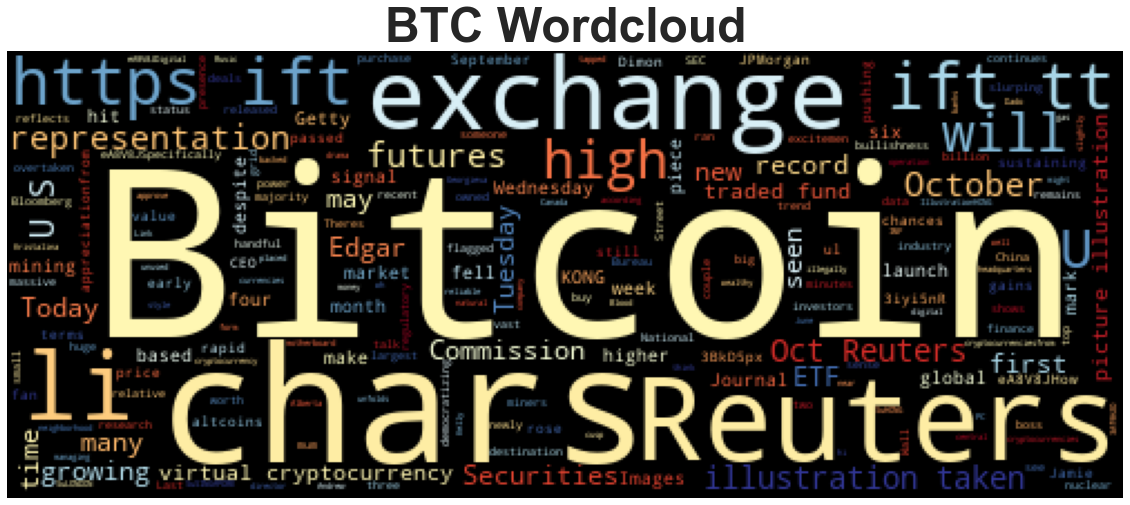

In [37]:
# Generate the Bitcoin word cloud
wordcloud(bitcoin_df.Text.str.cat(), title="BTC Wordcloud")

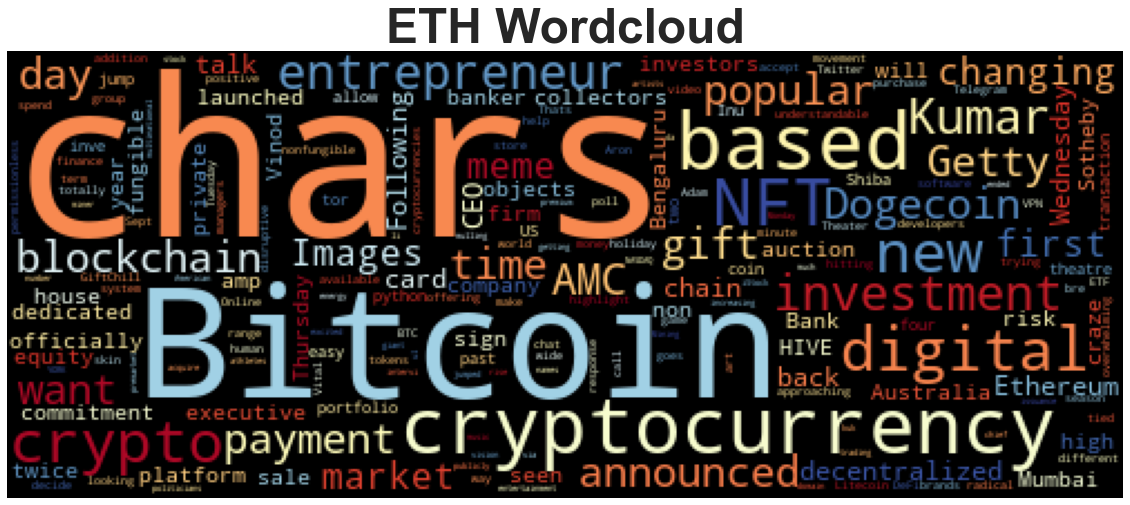

In [38]:
# Generate the Ethereum word cloud
wordcloud(ethereum_df.Text.str.cat(), title="ETH Wordcloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [53]:
import spacy
from spacy import displacy

In [54]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [55]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [56]:
# Concatenate all of the Bitcoin text together
btc_text = bitcoin_df.Text.str.cat()

In [57]:
# Run the NER processor on all of the text
doc = nlp(btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [60]:
# Render the visualization
displacy.render(doc, style="ent", jupyter=True)

In [61]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

4.6% PERCENT
53,859.6.</li><li MONEY
50,000 MONEY
first ORDINAL
four weeks DATE
Tuesday DATE
50,000 MONEY
Jamie Dimon PERSON
$1.6 billion MONEY
Wednesday DATE
a couple of minutes TIME
U.S. GPE
U.S. GPE
China GPE
the Wall Street Journal ORG
three CARDINAL
Journal ORG
Bitcoin ORG
Bloomberg ORG
the National Bureau ORG
SEC ORG
two CARDINAL
IMF ORG
Kristalina Georgieva PERSON
Canada GPE
Bitcoin NORP
Alberta GPE
Link Global PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationHONG KONG ORG
Oct 21 DATE
Reuters ORG
October 19, 2021 DATE
REUTERS ORG
Edgar SuLONDON PERSON
Oct 20 DATE
Reuters ORG
Exchange Commission ORG
Andrew Kelly PERSON
The US Securities and Exchange Commission ORG
as many as four CARDINAL
October DATE
October 18, 2021 DATE
REUTERS ORG
Edgar SuSINGAPORE PERSON
Oct 19 DATE
Reuters ORG
six-month DATE
October 19, 2021 DATE
REUTERS ORG
Edgar SuHONG KONG PERSON
Oct 20 DATE
Reuters ORG
Wednesday DATE
first ORDINAL
U.S. GPE
Conway G. Gittens PERSON
Reuters ORG
Reuters ORG
six

---

### Ethereum NER

In [62]:
# Concatenate all of the Ethereum text together
eth_text = ethereum_df.Text.str.cat()

In [63]:
# Run the NER processor on all of the text
doc = nlp(eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [64]:
# Render the visualization
displacy.render(doc, style="ent", jupyter=True)

In [65]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

NFT ORG
Getty Images PERSON
the minute TIME
Bitcoin(CRYPTO ORG
first ORDINAL
Tuesday DATE
DeFi GPE
Telegram ORG
2018 DATE
GiftChill ORG
this holiday season DATE
 ORGoin, Ethereum, Dogecoin and Litecoin
Ethereum PERSON
Twitter PRODUCT
Sept. 21 DATE
AMC Theater ORG
Adam Aron PERSON
Wednesday DATE
Getty PERSON
AMC ORG
Sothebys PERSON
Getty Images ORG
as much as 10% PERCENT
Monday DATE
the day DATE
1.8% PERCENT
Etherum GPE
Ripple ORG
Thursday DATE
MondayIlias Hatzis PERSON
Greece GPE
Founder & ORG
Commonwealth Bank of Australia ORG
first ORDINAL
Australia GPE
Wednesday DATE
Vinod Kumar PERSON
36 DATE
Bengaluru GPE
Shiba Inu ORG
the past two days DATE
Kumar PERSON
Vinod Kumar PERSON
36 DATE
Bengaluru GPE
Shiba Inu ORG
the past two days DATE
Kumar PERSON
AMC Theatres ORG
Georgia GPE
US GPE
Thursday DATE
Democrats NORP
$1.75 trillion MONEY
The Build Back Better Act LAW
Repo PERSON


---